<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/tensorflow/3_7_functional_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2312 - accuracy: 0.9309 - val_loss: 0.1162 - val_accuracy: 0.9654
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0948 - accuracy: 0.9710 - val_loss: 0.0905 - val_accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0652 - accuracy: 0.9792 - val_loss: 0.0820 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0496 - accuracy: 0.9837 - val_loss: 0.1040 - val_accuracy: 0.9716
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0874 - val_accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0340 - accuracy: 0.9888 - val_loss: 0.0850 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0817 - val_accuracy:

# 함수형 API(Functional API)

다중 입력, 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입,출력을 공유하는 구조도 가능하다.

In [ ]:
# 모델의 Input layer 정의
input_layer = tf.keras.Input(shape=(28,28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


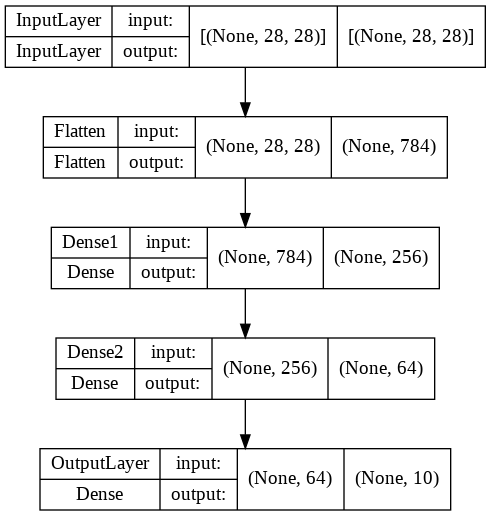

In [ ]:
# 구조도 시각화(각 layer의 명칭이 box의 왼쪽 상단에 표시됨)
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [ ]:
# compile
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# training
func_model.fit(x_train, y_train, epochs=3)

# evaluation
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2070 - accuracy: 0.9379
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0881 - accuracy: 0.9726
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0602 - accuracy: 0.9806
Functional Model] loss: 0.07690, acc: 0.97550


Model Subclassing은 함수형 API로 생성한 모델과의 성능 차이는 없기 때문에 굳이 다음으로 구현하지 않아도 좋다. Sequential/Functional API으로도 충분하다.

# Model Subclassing

아래와 같이 Model Subclassing으로 모델 인스턴스를 생성하기 위해서는 tf.keras.Model을 상속받아 생성하고자 하는 모델 클래스를 구현한다.

In [ ]:
class MyModel(tf.keras.Model):
    def __init__(self):          # layer와 layer의 hyperparameter를 정의함.
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

    # method overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):          # fit() 메소드가 호출되어 훈련하는 경우 호출될 함수임.
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

# 모델 생성(tf.keras.Model을 상속받아 구현한 모델인 MyModel을 생성자로 인스턴스 생성!)
mymodel = MyModel()

# 모델 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_8 (Dense)             multiple                  200960    
                                                                 
 dense_9 (Dense)             multiple                  16448     
                                                                 
 dense_10 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# training
mymodel.fit(x_train, y_train, epochs=3)

# evaluation
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2136 - accuracy: 0.9367
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0871 - accuracy: 0.9736
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0601 - accuracy: 0.9810
Subclassing Model] loss: 0.08857, acc: 0.97260


다음은 모델의 생성자(MyModel) 파라미터를 추가하여 동적으로 layer의 유닛(노드) 개수를 초기화하는 예제이다.

In [ ]:
## 서브클래싱 모델 파라미터를 활용한 생성

class MyModel(tf.keras.Model):

    # 생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

# 모델 생성
model = MyModel(256, 10)     # units=256, num_classes=10(출력층의 노드 개수)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_8 (Dense)             multiple                  200960    
                                                                 
 dense_9 (Dense)             multiple                  16448     
                                                                 
 dense_10 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 

# training
mymodel.fit(x_train, y_train, epochs=3)

# evaluation
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0472 - accuracy: 0.9847
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0292 - accuracy: 0.9902
Subclassing Model w.parameters] loss: 0.09502, acc: 0.97420
